# 6주차

## ConditionalFreqDist 조건에 맞게 FreqDist 사용
- 형식 : nltk.ConditionalFreqDist()
- 표로 출력 : cfd.tabulate(conditions=, samples=)
- 그래프로 출력: .plot()

In [1]:
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\aliya\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\aliya\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [4]:
#cfd 표현 방법 1
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) # fileid도 넣을 수 있으므로
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [5]:
#cfd 표현 방법 2
#modals의 빈도수가 포함된 cfd (word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may']
      
    for word in brown.words(categories=genre)
        if word.lower() == modal
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


## Inaugural (연설문)
- 파일 이름 형식 : 연도-이름.txt

In [8]:
inaugural = nltk.corpus.inaugural

#### QUIZ

- ['america', 'citizen'] 빈도수를 cfd로 만드시오.(citizens, citizen's 등 다 포함)

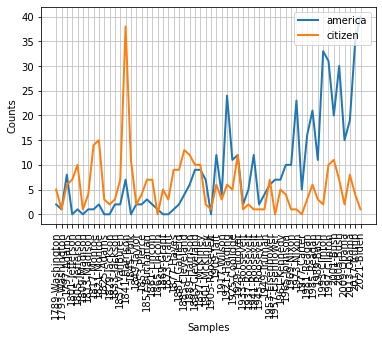

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) # txt 제외
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen'] #소문자인 이유
    
    for word in inaugural.words(fileids=fileid)
        if word.lower().startswith(target_word)#방법1
        #if word.lower() == target_word#방법2
        #if target_word in word.lower()#방법3
)
cfd2.plot()

# **튜플과 리스트**

- **튜플** : 할당 후 바꿀 수 없음. 불변. 메모리 사용 적음. 변하지 않는 데이터 시퀀스(타인의 접근 예방 가능).
- **리스트** : 할당 후 바꿀 수 있음. 가변. 데이터 순차적으로 파악할 때 유용. 
- 중복 가능
- 형변환: tuple() list()
- **1. 생성**
    - 튜플 : 빈 괄호/ tuple()
    - 리스트 : 빈 대괄호/ list()
- **2. 언패킹, 패킹**
    - packing : 한 변수에 여러 데이터를 할당하는 것
        - list, tuple 자체가 packing이다. a = [1, 2, 3]
    - **unpacking** : 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것.
        -  예 )a = 'k', b = 'i', c = 'm'

- 튜플도 연산, 비교, 순회 가능

In [14]:
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [15]:
# 1.1 요소 여러 개일 때
alphabetT = ('a', 'b') #방법 1
alphabetT = 'a', 'b' #방법 2,더 편함
alphabetT

alphabetL = ['a', 'b']

In [17]:
# 1.2. 요소 1개일 때!! 콤마 찍어줘야 튜플로 형 바뀜.
alphaT = ('b',)
type(alphaT)

tuple

In [18]:
#unpacking 예시
a, b, c = 'kim' 
a, b, c

('k', 'i', 'm')

In [19]:
#튜플은 간편하게 값을 교환하는 것도 가능하다.
pwd = 'abcd'
userId = 'sky'
pwd, userId = userId, pwd
pwd, userId

('sky', 'abcd')

In [20]:
#순회
for i in x: #방법 1
    print(x)
    
    
[i for i in x] #방법 2, 추천 방법

NameError: name 'x' is not defined

## **리스트의 유용한 함수들**

-split(’구분자’) : 구분자 단위로 분할해서 리스트 생성
-.append() : 리스트 끝에 새 항목 추가(한 개만 가능)
-.insert(오프셋, 넣을 요소) : 원하는 위치에 항목 추가
- .extend(새로운 리스트) : 리스트 병합( + 또는 +=으로도 병합 가능)
-슬라이싱, += 가능
- del 인덱스 : 항목 삭제
-.remove(’항목’) : 항목 삭제, 중복되는 항목은 첫 번째 항목만 삭제
-.pop(위치) : 리스트에서 항목 가져오면서 동시에 항목 삭제
-.clear() : 
-sorted(리스트 이름)
-.copy() : shallow copy. 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사
-.deepcopy(복사할 원래 리스트 이름) : 모든 항목 지우기
-zip(리스트들) : 여러 시퀀스 순회하기
-enumerate(name): 리스트 + 인덱스

## **list comprehension**

- 형식 : [(i, j) for u, j in zip(name, age)]

# QUIZ
- [(대문자, 첫글자대문자, 글자수), ...]  리스트 만들기

In [25]:
sentence = "do not judge a book by its cover"

In [26]:
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [27]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

#1. 문장마다 스트링으로 변환해서 리스트로 변환
    #['문장1', '문장2']
#2. 전체를 스트링으로 변환
    # '문장1 문장2'
#3. 전체 단어 리스트 가져오기
#[sunja, said, ...]

In [28]:
[" ".join(sent) for sent in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [29]:
" ".join([" ".join(sent) for sent in text])

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [30]:
[word for sent in text for word in sent] #3 답

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [31]:
#else쓰기 - if문 앞으로 끌고 나오기
[i if i % 2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']